In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import umap

2024-01-08 17:03:52.207113: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-08 17:03:52.286503: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-08 17:03:52.701280: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-08 17:03:52.701406: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-08 17:03:52.726356: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
# Download MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

SLICE = slice(10000,20000)
# Now x_train, y_train, x_test, y_test contain the training and testing data

MNIST contains 784 dimensions. Each sample in x_train is an image. Each image has 28 rows and 28 columns to represent 784 pixels (28*28). So, MNIST images contain 784 dimensions. These need to be reduced (to avoid ["the curse of dimensiontality"](https://en.wikipedia.org/wiki/Curse_of_dimensionality))

In [3]:
print(f"Rows in Image: {len(x_train[0])},\
      \nColumns in Image: {len(x_train[0][0])},\
      \nDimensions (pixels): {len(x_train[0])*len(x_train[0][0])}")

Rows in Image: 28,      
Columns in Image: 28,      
Dimensions (pixels): 784


In [4]:
pca = PCA(n_components=2)

In [5]:
# Reshaped to have 10000 samples (images) with 784 columns each. Sklearn requires 2d numpy arrays so rather than having a 3D array, 
# with each image being a 2D array, the images are extended to have a column for each pixel.
ten_thou_pca = pca.fit_transform(X=x_train[SLICE].reshape(10000, 784), y=y_train[SLICE])

In [6]:
len(ten_thou_pca)

10000

<AxesSubplot:>

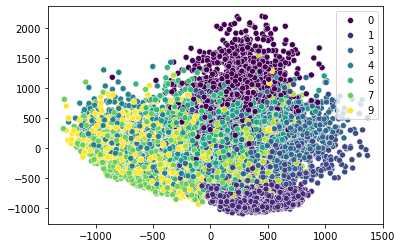

In [7]:
# xs = [components[0] for components in sixty_thou_clusters.components_]
# ys = [components[1] for components in sixty_thou_clusters.components_]
sns.scatterplot(y=ten_thou_pca[:,0], x=ten_thou_pca[:,1], hue=y_train[SLICE], palette='viridis')

In [8]:
umap_model = umap.UMAP()
embedding = umap_model.fit_transform(X=x_train[SLICE].reshape(10000, 784), y=y_train[SLICE])

<AxesSubplot:>

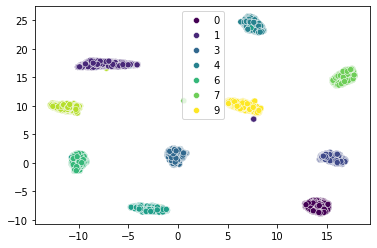

In [9]:
sns.scatterplot(y=embedding[:,0], x=embedding[:,1], hue=y_train[SLICE], palette='viridis')

In [10]:
### TODO: implement kmeans

In [11]:
pca.fit(faces_standardized)

# 2. Retrieve and plot eigenvectors (eigenfaces)
eigenfaces = pca.components_ 

fig = plt.figure(figsize=(10, 8))
fig.suptitle('Eigenvectors of Images (Eigenfaces)')
for i in range(15):
    # Create subplot, remove x and y ticks, and add title
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f'Eigenface: #{i}')
    
    # Get an eigenvector from the current value of i
    eigenface = eigenfaces[i]

    # Reshape this image into 64x64 since the flattened shape was 4096
    eigenface_reshaped = eigenface.reshape(64, 64)

    # Show the image
    ax.imshow(eigenface_reshaped, cmap=plt.cm.bone)
plt.show()

# 3. Reconstruct images from the compressed principal components
# The principal components are usually calculated using `faces_standardized @ principal_axes` or the `.transform` method
principal_components = pca.transform(faces_standardized) 

# The `inverse_transform` method allows for reconstruction of images in the original size
faces_reconstructed = pca.inverse_transform(principal_components)

# Plot the reconstructed images 
fig = plt.figure(figsize=(10, 8))
fig.suptitle('Reconstructed Images from Principal Components')
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f'Reconstructed: {i}')

    reconstructed_face = faces_reconstructed[i]
    reconstructed_face_reshaped = reconstructed_face.reshape(64, 64)
    ax.imshow(reconstructed_face_reshaped, cmap=plt.cm.bone)
plt.show()


NameError: name 'faces_standardized' is not defined

In [ ]:
np.set_printoptions(precision=4, suppress=True)

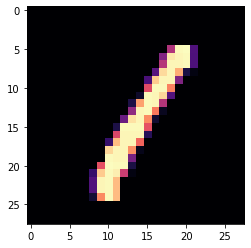

In [ ]:
plt.imshow(x_train[3], cmap='magma')